## 2-2. 연간 앨범 판매량 순위 차트 크롤링

- 써클차트(가온차트)의 연간 앨범 판매량 순위를 크롤링한다.

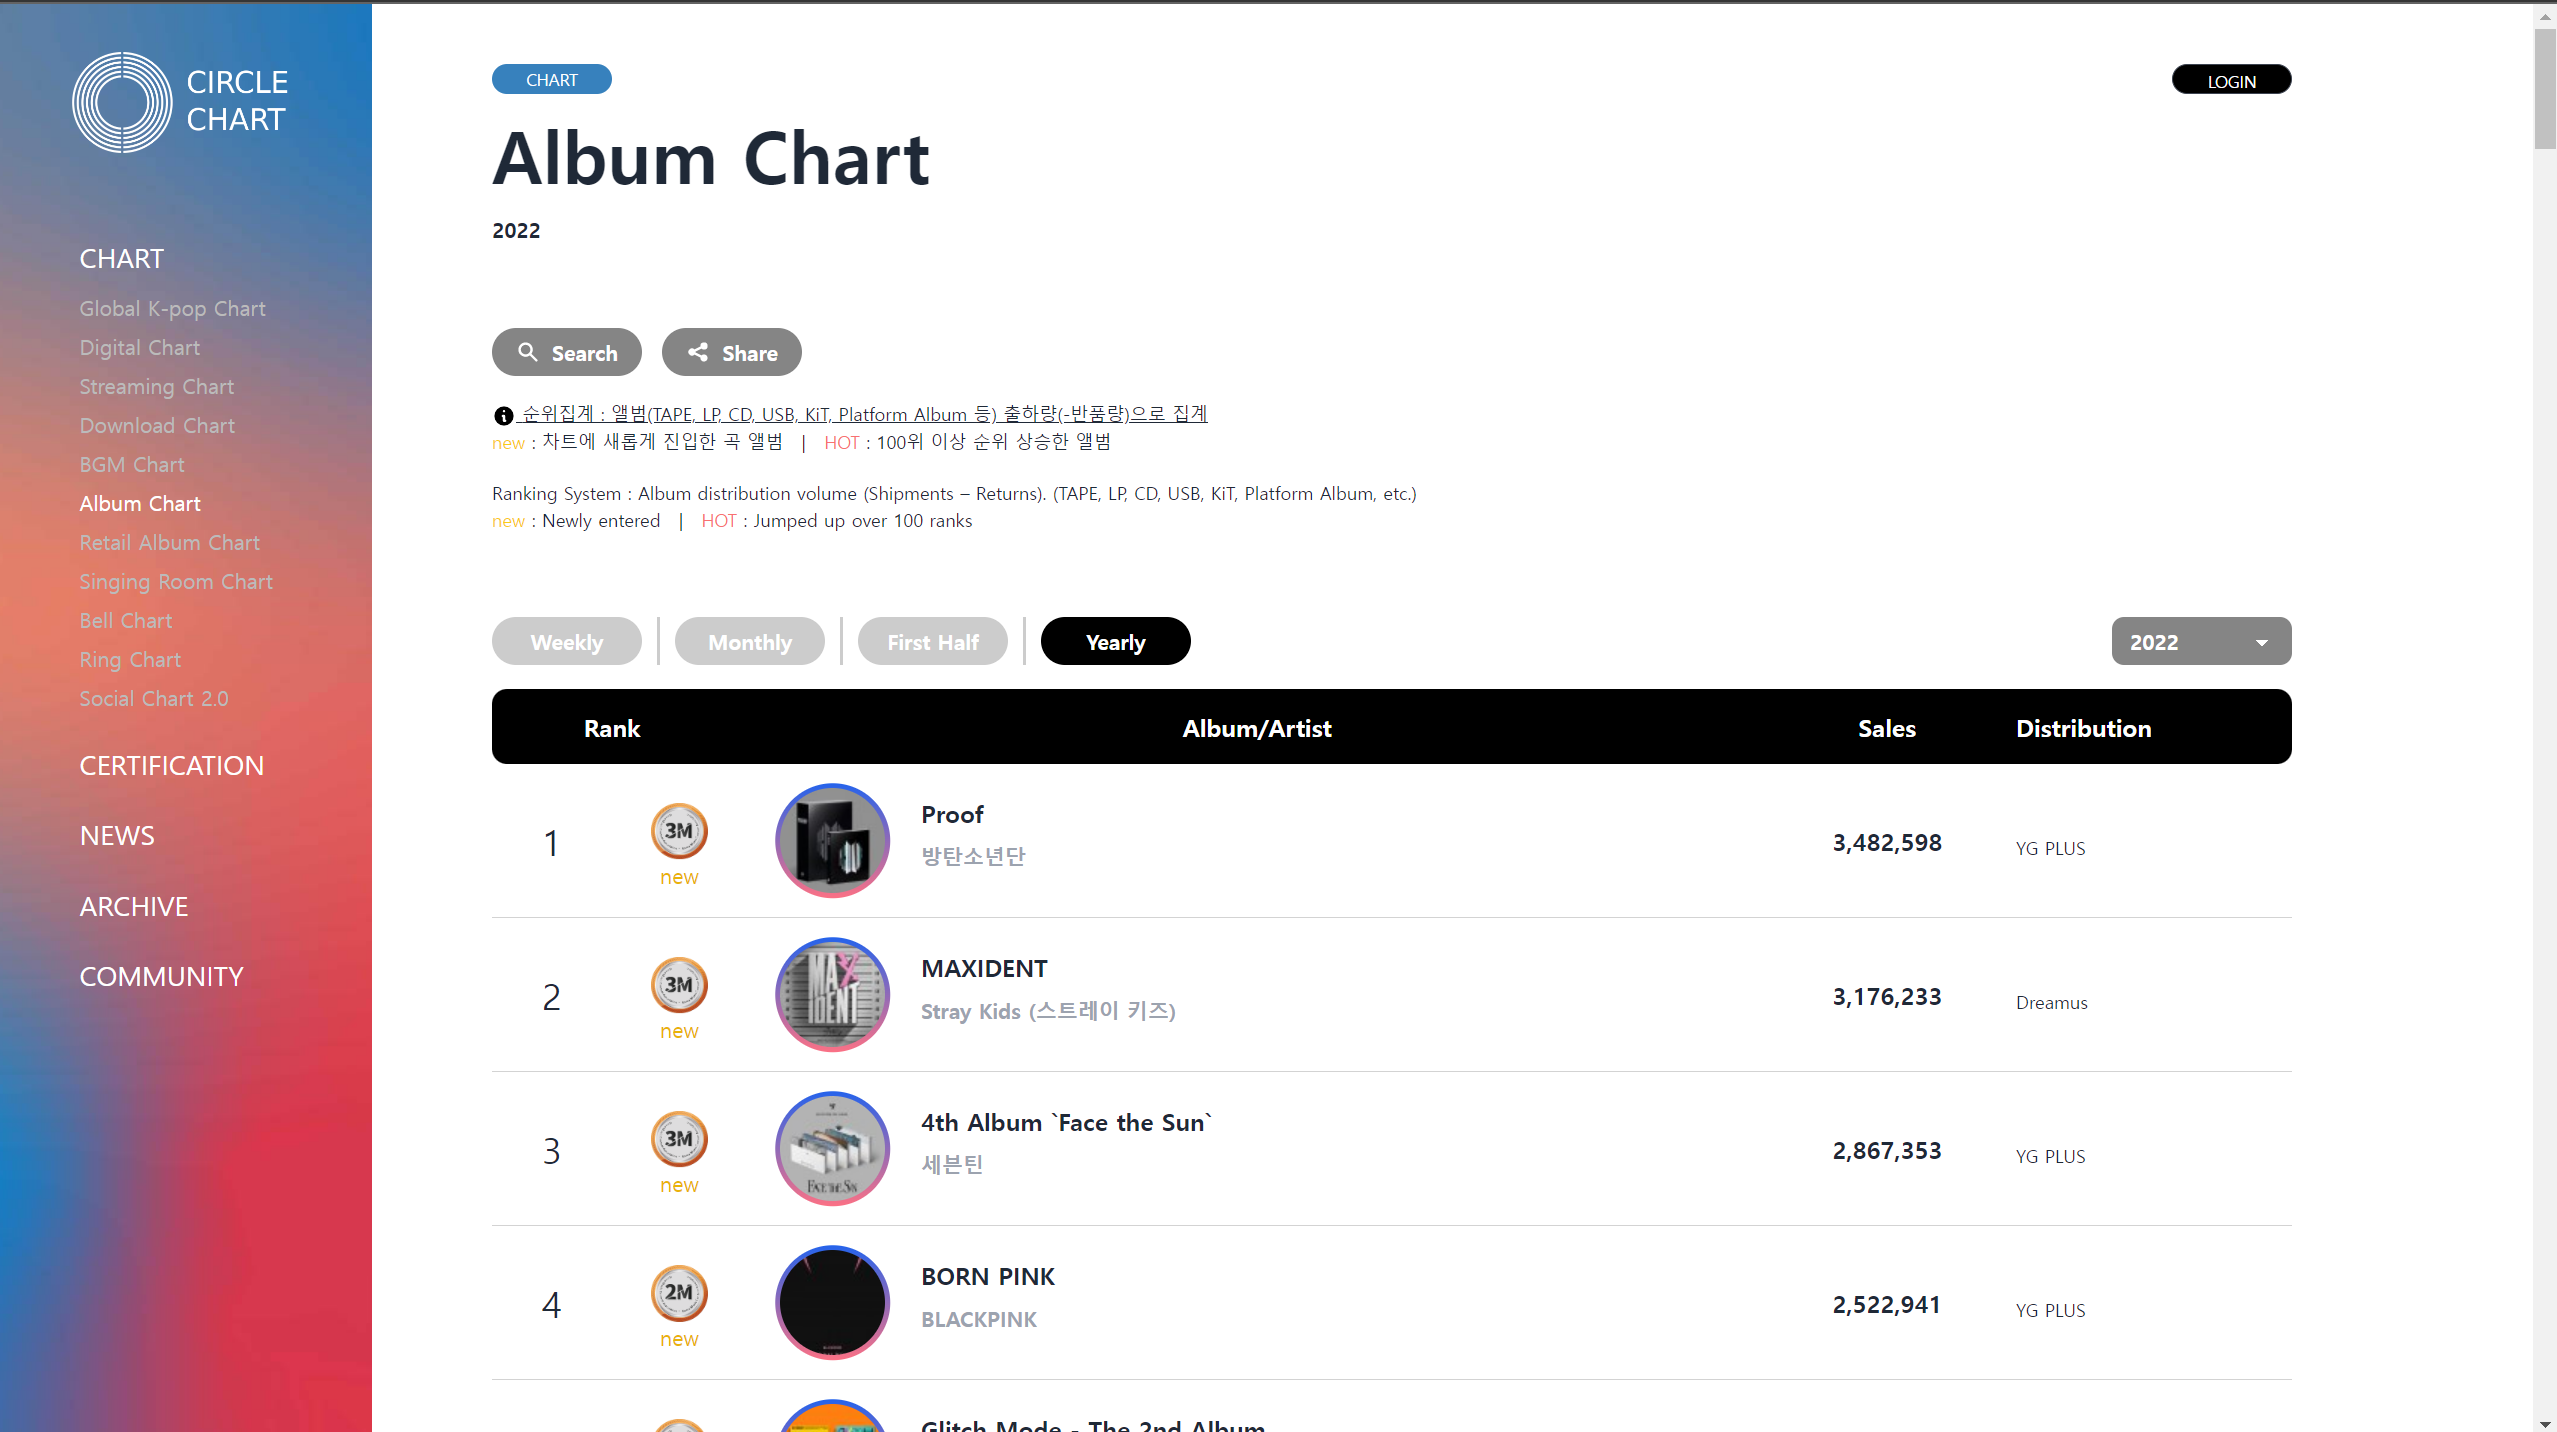

In [1]:
from IPython.display import Image
Image("data/circlechart.PNG")

In [16]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import re

In [19]:
# driver_path = 'C:/Users/Playdata/Desktop/dev/setup/chromdriver.exe'
driver_path = 'C:/Users/k9942/OneDrive/바탕 화면/playdata/dev/setup/chromdriver.exe'
driver = webdriver.Chrome(driver_path)

C:\Users\k9942\AppData\Local\Temp\ipykernel_11396\3454815965.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(driver_path)


In [20]:
url = 'https://circlechart.kr/page_chart/album.circle?nationGbn=T&targetTime=2022&hitYear=2022&termGbn=year&yearTime=3'
driver.get(url)
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

- 연간 앨범 순위 정보 크롤링 함수 <br>
create_yearly_chart(chart_tr, year)

In [57]:
chart_tr = soup.select('#pc_chart_tbody > tr')

def create_yearly_chart(chart_tr, year):
    rank = 0
    chart_total_list = []

    for chart in chart_tr:
        title = chart.select_one('div.ml-6 > div.mb-2').get_text() # 앨범명
        singer = chart.select_one('div.ml-6 > .text-sm').get_text() # 가수명
        sales = chart.select_one('td.text-center > span.font-bold').get_text().strip() # 앨범판매량
        rank += 1 # 순위

        chart_list = [year, rank, title, singer, sales]
        chart_total_list.append(chart_list)
    
    return chart_total_list

- 연도별 url 생성 함수
<br> get_url(year)

In [53]:
def get_url(year):
    url = f'https://circlechart.kr/page_chart/album.circle?nationGbn=T&targetTime={year}&hitYear={year}&termGbn=year&yearTime=3'
    return url

- 연간 앨범 순위 정보 크롤링

In [63]:
year_list = [i for i in range(2018, 2023)] # 2018~2023 5년간의 데이터 크롤링
total_chart_list = []

for year in year_list:
    url = get_url(year) # 연도별 url 생성
    driver.get(url)
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    chart_tr = soup.select('#pc_chart_tbody > tr')

    # 1년 데이터
    one_year_chart_list = create_yearly_chart(chart_tr, year)

    # 5년 데이터
    total_chart_list += one_year_chart_list


In [64]:
len(total_chart_list) # 5 * 100 = 500 (1년에 순위 100개)

500

- 5년 간의 앨범 순위 정보를 저장한 yearly_album_chart_df 생성

In [66]:
yearly_album_chart_df = pd.DataFrame(total_chart_list)
yearly_album_chart_df.columns = ['year', 'rank', 'title', 'singer', 'sales']
yearly_album_chart_df.head()

,year,rank,title,singer,sales
0,2018,1,LOVE YOURSELF 結 `Answer`,방탄소년단,"2,197,808"
1,2018,2,LOVE YOURSELF 轉 `Tear`,방탄소년단,"1,849,537"
2,2018,3,DON`T MESS UP MY TEMPO - The 5th Album,EXO,"1,452,030"
3,2018,4,0+1=1 (I PROMISE YOU),Wanna One (워너원),"782,562"
4,2018,5,1÷χ=1 (UNDIVIDED),Wanna One (워너원),"641,131"


---

* 's (작은 따옴표) 때문에 쿼리 Syntax 오류가 난다.
-> 앞에 작은 따옴표를 하나 더 붙여서 이스케이프를 해야한다.

In [2]:
# yearly_album_chart_df['title'] = [title.replace("'", "''") for title in yearly_album_chart_df['title']]
# yearly_album_chart_df['title'] = [title.replace("`", "''") for title in yearly_album_chart_df['title']]

- sales 컬럼 int형 변환

In [6]:
# yearly_album_chart_df['sales'] = [sales.replace(',', '') for sales in yearly_album_chart_df['sales']]
# yearly_album_chart_df['sales'].astype('int')
# yearly_album_chart_df.head()

,year,rank,title,singer,sales
0,2018,1,LOVE YOURSELF 結 ''Answer'',방탄소년단,2197808
1,2018,2,LOVE YOURSELF 轉 ''Tear'',방탄소년단,1849537
2,2018,3,DON''T MESS UP MY TEMPO - The 5th Album,EXO,1452030
3,2018,4,0+1=1 (I PROMISE YOU),Wanna One (워너원),782562
4,2018,5,1÷χ=1 (UNDIVIDED),Wanna One (워너원),641131


In [7]:
yearly_album_chart_df.to_csv('data/yearly_album_chart_df.csv', index=False)

- csv 파일 확인

In [1]:
import pandas as pd
yearly_album_chart_df = pd.read_csv('data/yearly_album_chart_df.csv')
yearly_album_chart_df

,year,rank,title,singer,sales
0,2018,1,LOVE YOURSELF 結 ''Answer'',방탄소년단,2197808
1,2018,2,LOVE YOURSELF 轉 ''Tear'',방탄소년단,1849537
2,2018,3,DON''T MESS UP MY TEMPO - The 5th Album,EXO,1452030
3,2018,4,0+1=1 (I PROMISE YOU),Wanna One (워너원),782562
4,2018,5,1÷χ=1 (UNDIVIDED),Wanna One (워너원),641131
...,...,...,...,...,...
495,2022,96,혼돈의 장: FREEZE,투모로우바이투게더,152900
496,2022,97,The Story (META),강다니엘,149807
497,2022,98,REFUGE,문빈&산하,147056
498,2022,99,Love Pt.2 : Passion,위아이 (WEi),146044
